Defaulting to user installation because normal site-packages is not writeable
========== LOADING AND PREPARING DATA ==========
Train data shape: (15308, 23)
Test data shape: (914, 23)

Train data columns:
['row_id', 'agent_code', 'agent_age', 'agent_join_month', 'first_policy_sold_month', 'year_month', 'unique_proposals_last_7_days', 'unique_proposals_last_15_days', 'unique_proposals_last_21_days', 'unique_proposal', 'unique_quotations_last_7_days', 'unique_quotations_last_15_days', 'unique_quotations_last_21_days', 'unique_quotations', 'unique_customers_last_7_days', 'unique_customers_last_15_days', 'unique_customers_last_21_days', 'unique_customers', 'new_policy_count', 'ANBP_value', 'net_income', 'number_of_policy_holders', 'number_of_cash_payment_policies']

Test data columns:
['row_id', 'agent_code', 'agent_age', 'agent_join_month', 'first_policy_sold_month', 'year_month', 'unique_proposals_last_7_days', 'unique_proposals_last_15_days', 'unique_proposals_last_21_days', 'unique_pro


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


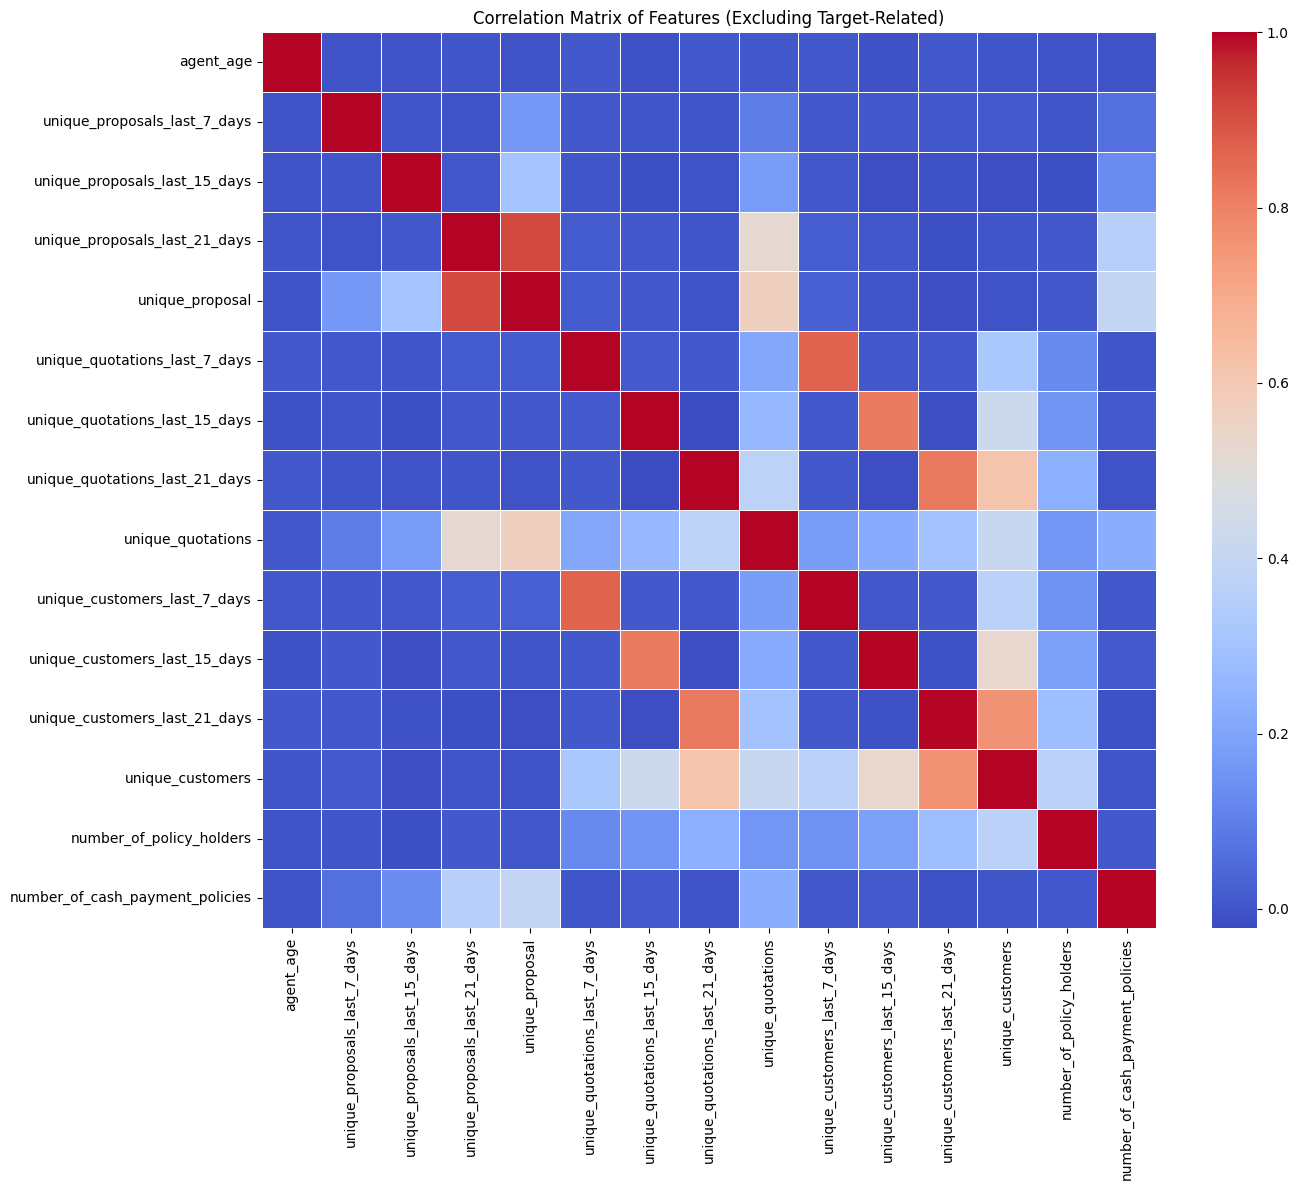


3. Feature Distributions by Target:


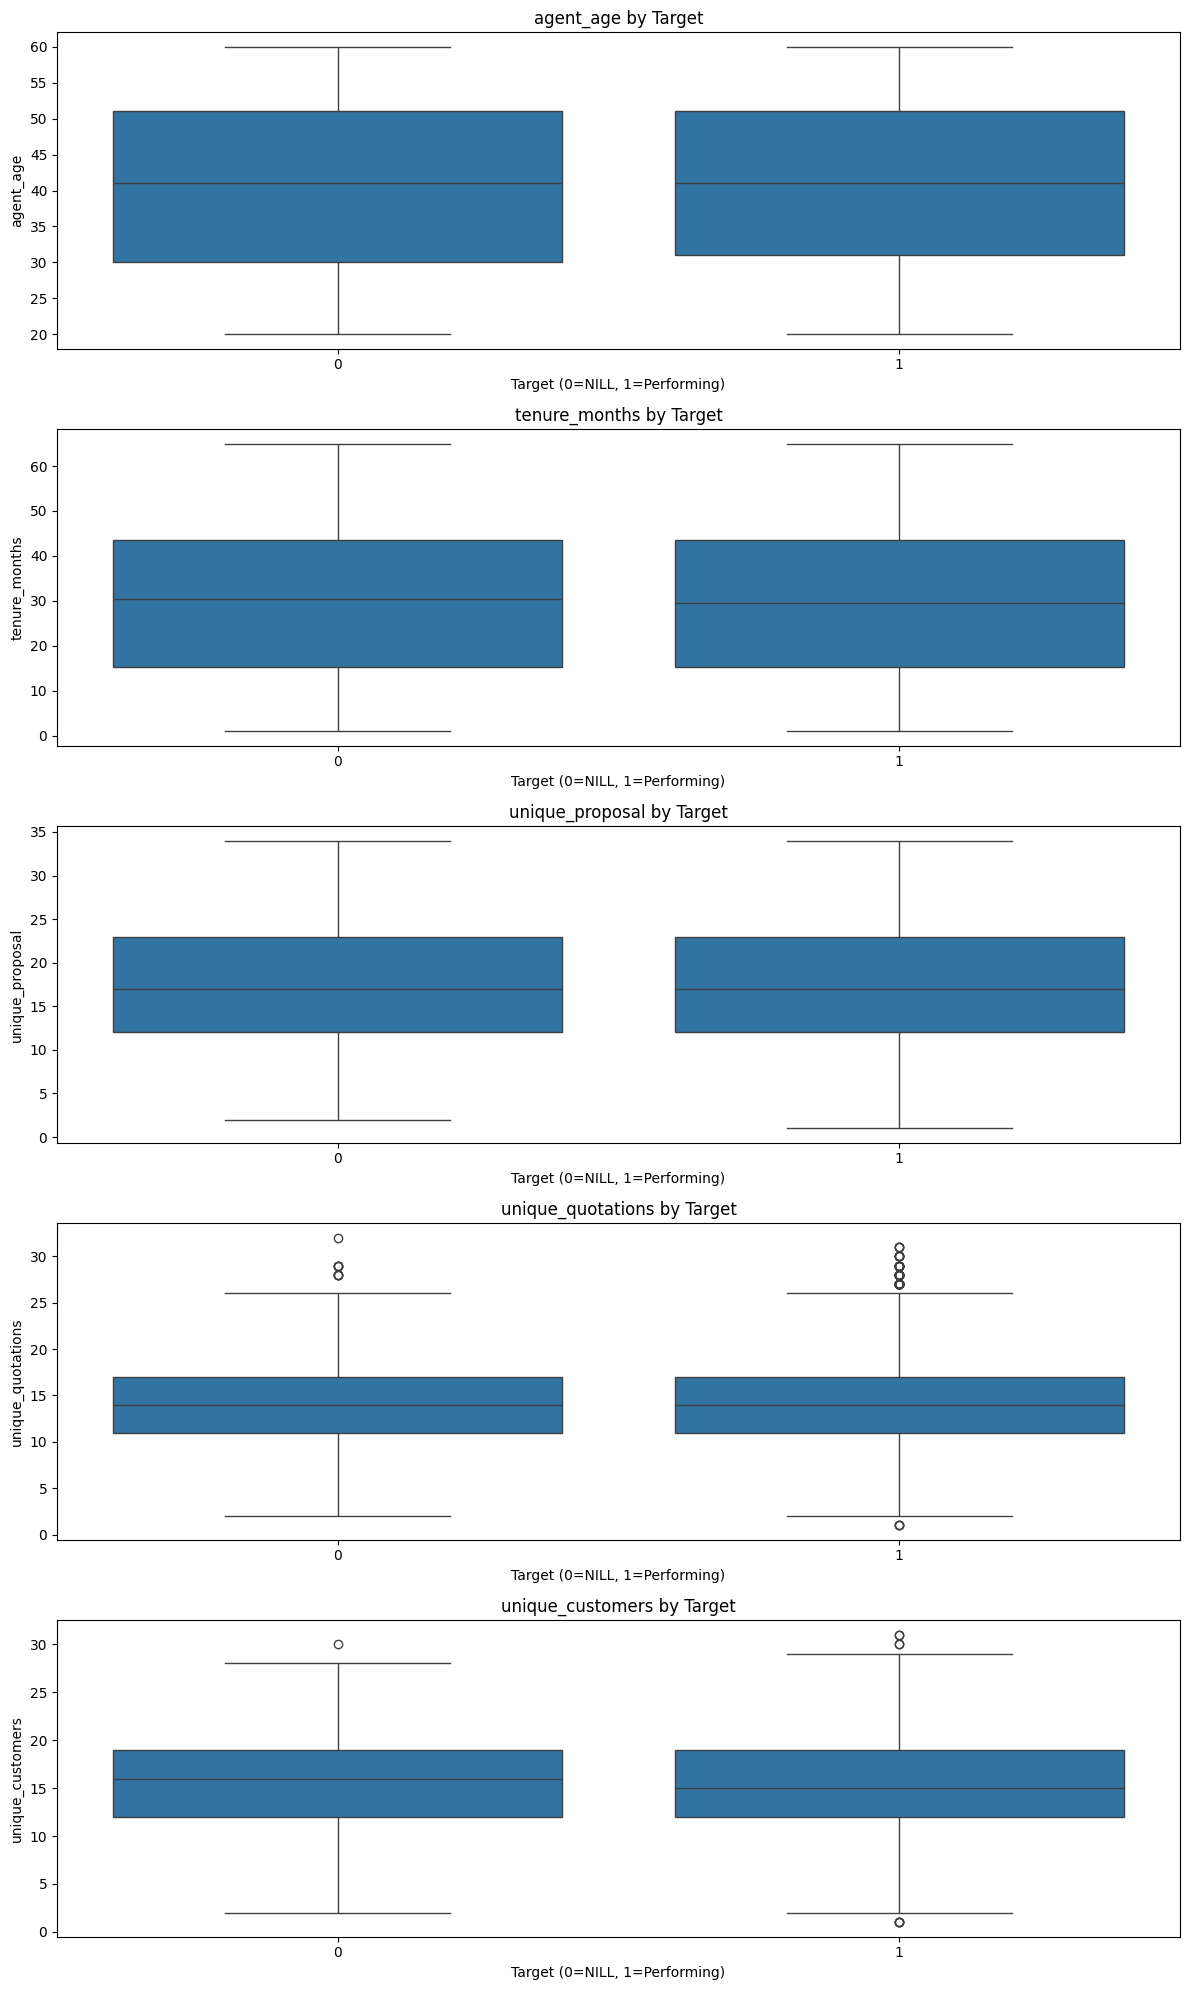


========== FEATURE ENGINEERING ==========
Preparing features for train data...
Preparing features for test data...
Processed train data shape: (15308, 49)
Processed test data shape: (914, 48)

========== MODEL BUILDING ==========
Removing non-numeric columns: ['month', 'quarter']
Training set shape: (12246, 44)
Validation set shape: (3062, 44)
Class distribution in training set: target_column
1    90.0049
0     9.9951
Name: proportion, dtype: float64

========== FEATURE SELECTION ==========
Top 15 features by importance:
                          Feature  Importance
31           customer_trend_short    0.028354
15                  tenure_months    0.028015
35     customer_to_proposal_ratio    0.027997
41         age_tenure_interaction    0.027523
23          proposal_acceleration    0.027103
36             activity_diversity    0.026770
3   unique_proposals_last_21_days    0.026711
17           months_to_first_sale    0.026540
20               proposal_recency    0.026429
2   unique_p

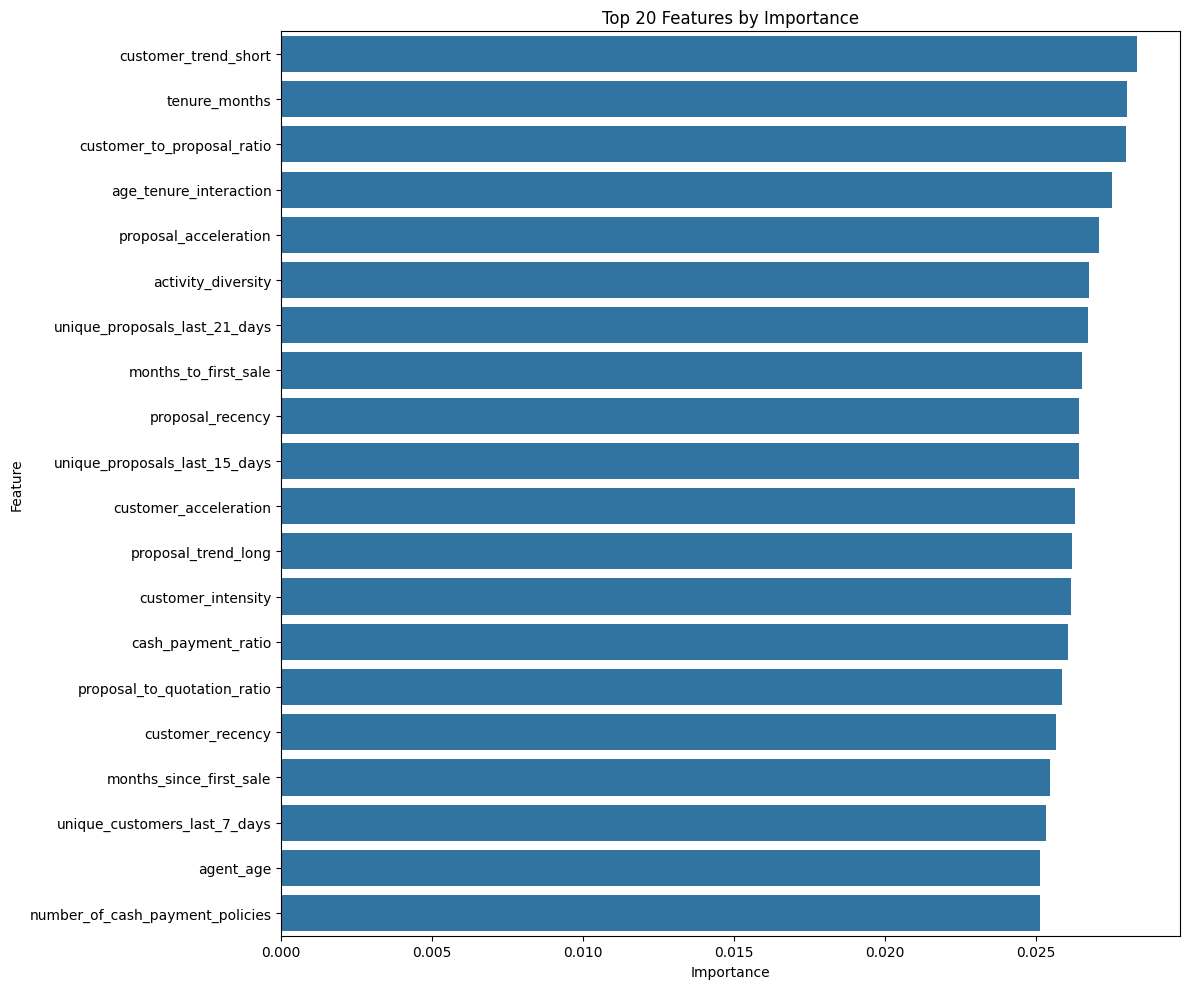


Selected 36 features out of 44:
1. agent_age
2. unique_proposals_last_15_days
3. unique_proposals_last_21_days
4. unique_proposal
5. unique_quotations_last_7_days
6. unique_quotations_last_21_days
7. unique_quotations
8. unique_customers_last_7_days
9. unique_customers_last_15_days
10. unique_customers_last_21_days
11. unique_customers
12. number_of_policy_holders
13. number_of_cash_payment_policies
14. tenure_months
15. months_since_first_sale
16. months_to_first_sale
17. proposal_intensity
18. proposal_recency
19. proposal_trend_short
20. proposal_trend_long
21. proposal_acceleration
22. quotation_intensity
23. quotation_recency
24. quotation_trend_short
25. quotation_acceleration
26. customer_intensity
27. customer_recency
28. customer_trend_short
29. customer_trend_long
30. customer_acceleration
31. proposal_to_quotation_ratio
32. customer_to_proposal_ratio
33. activity_diversity
34. age_tenure_interaction
35. proposal_quotation_interaction
36. cash_payment_ratio

========== CLASS

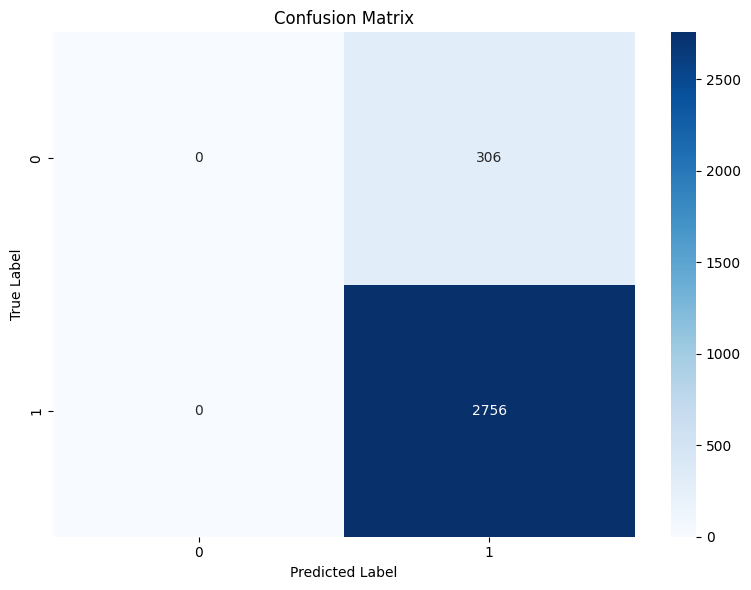

ROC AUC Score: 0.5050
Precision-Recall AUC: 0.9007


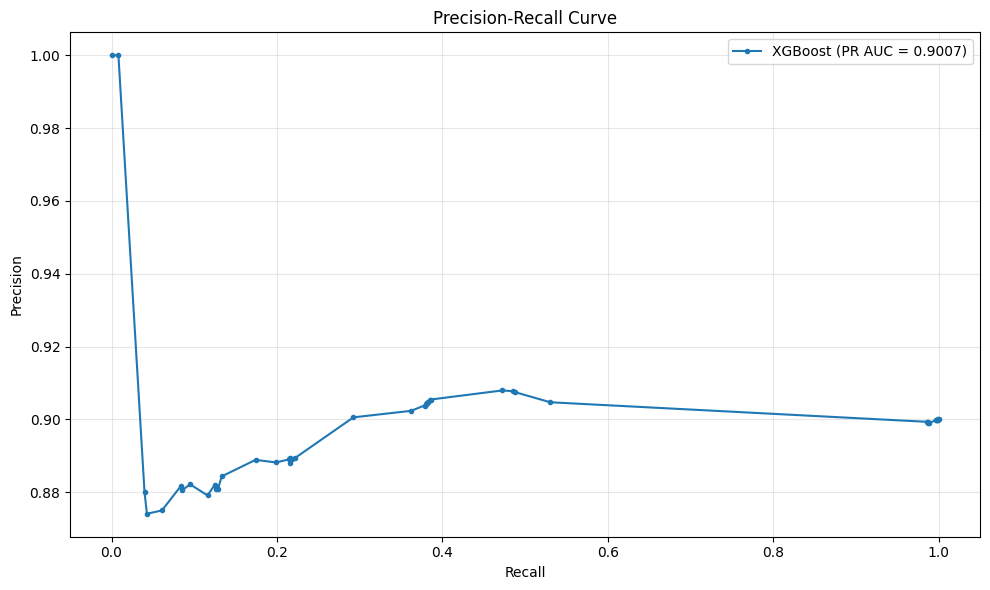


========== THRESHOLD OPTIMIZATION ==========


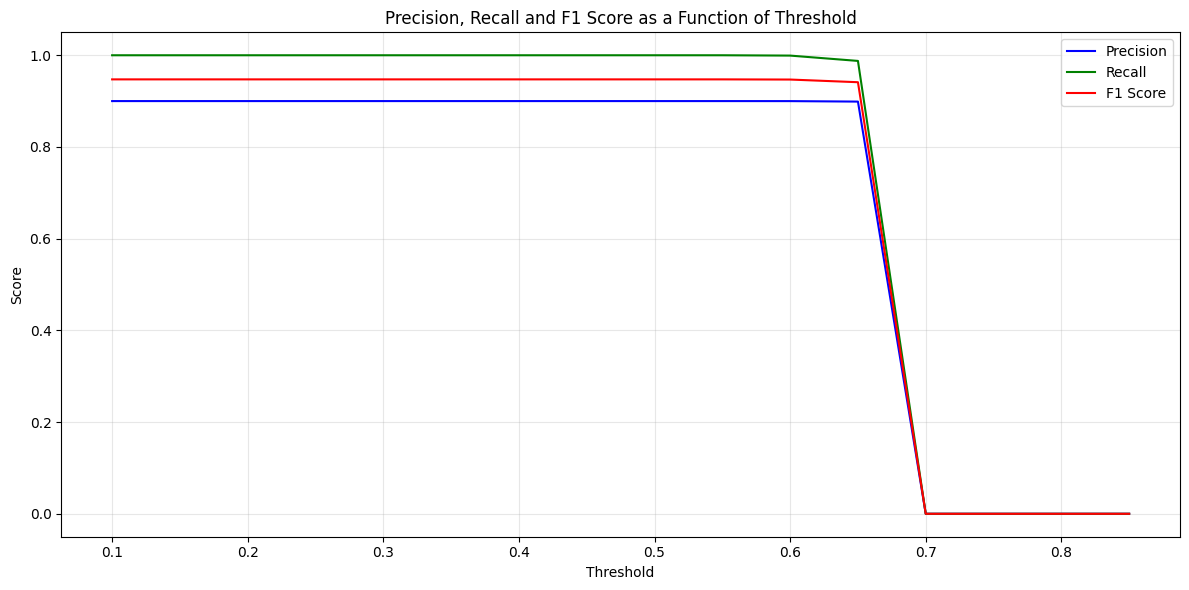

Optimal threshold: 0.10
Precision at optimal threshold: 0.9001
Recall at optimal threshold: 1.0000
F1 Score at optimal threshold: 0.9474

========== MODEL INTERPRETABILITY ==========
Top 10 features in the final model:
                           Feature  Importance
1    unique_proposals_last_15_days    0.209915
4    unique_quotations_last_7_days    0.172401
5   unique_quotations_last_21_days    0.107000
7     unique_customers_last_7_days    0.080356
17                proposal_recency    0.063110
18            proposal_trend_short    0.047020
35              cash_payment_ratio    0.032141
2    unique_proposals_last_21_days    0.022842
15            months_to_first_sale    0.015464
3                  unique_proposal    0.013747


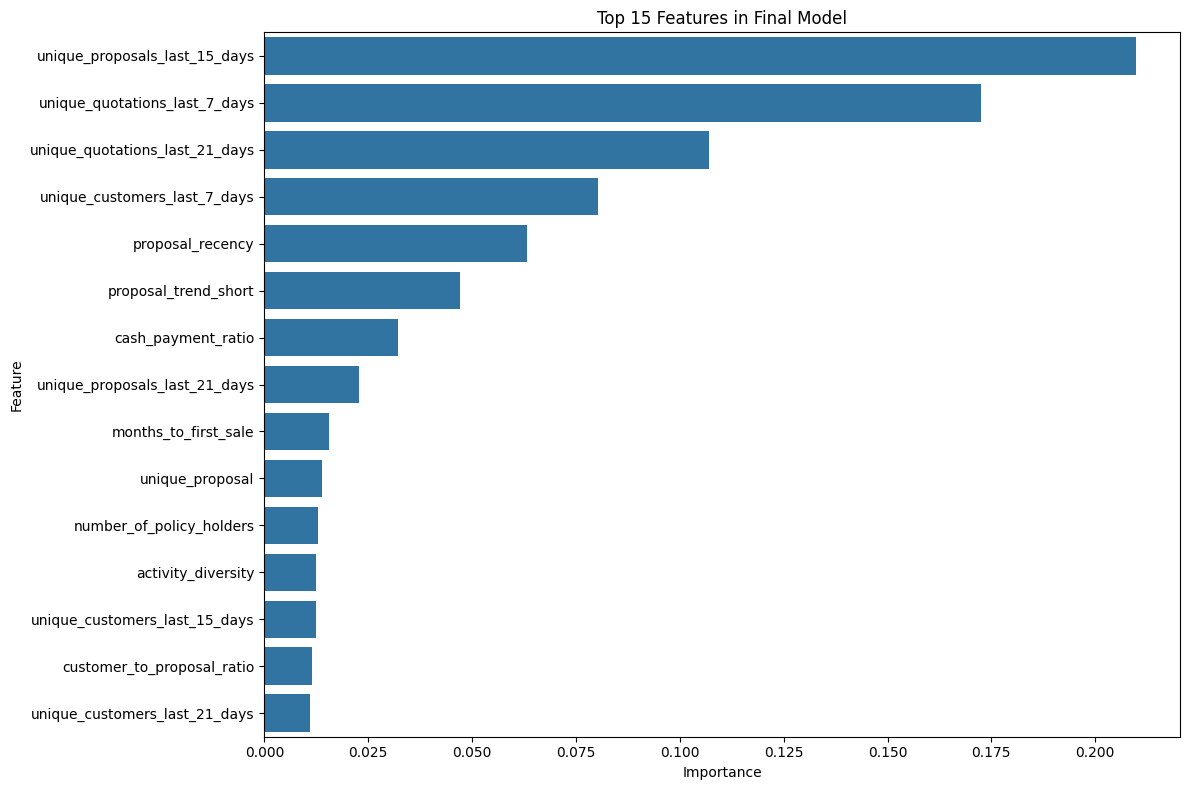

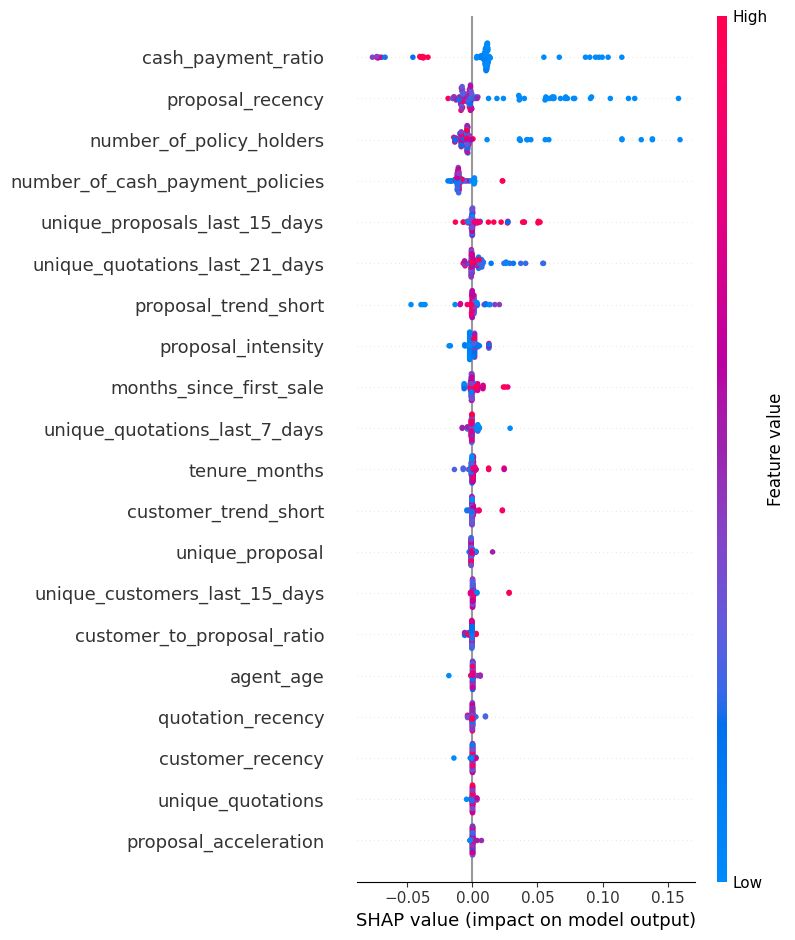

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

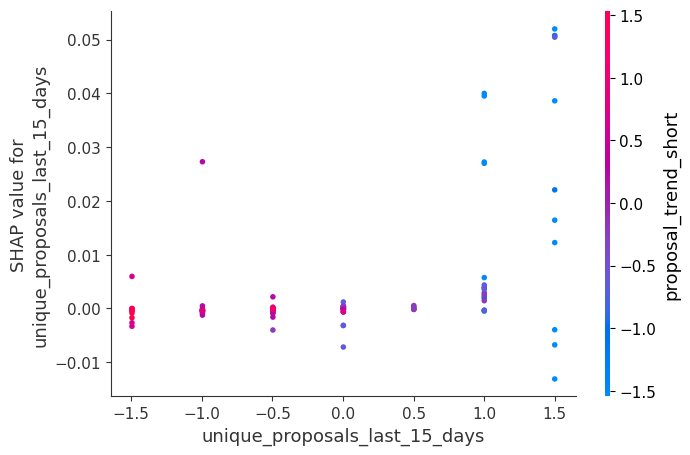

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

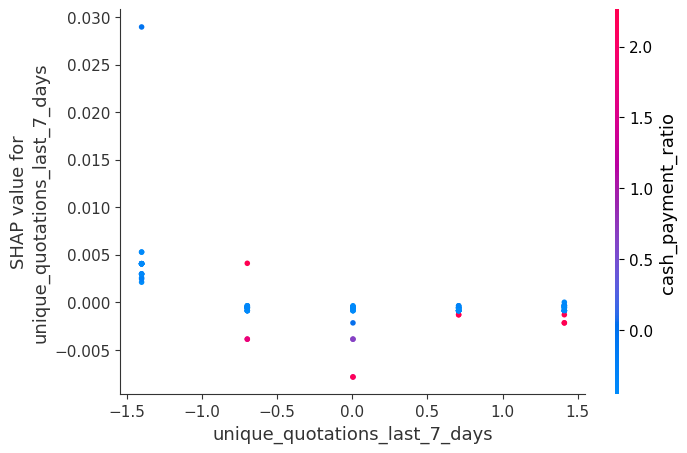

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

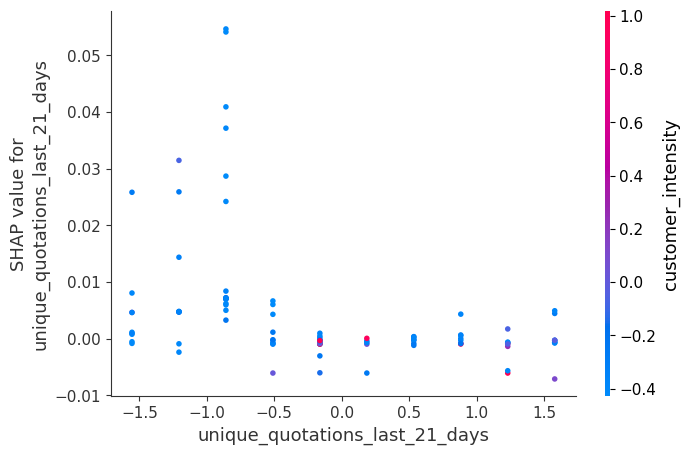

<Figure size 640x480 with 0 Axes>


========== PREDICTION ON TEST DATA ==========
Removing non-numeric columns from test data: ['month', 'quarter']
Sample of predictions:
   row_id  target_column
0       1              1
1       2              1
2       3              1
3       4              1
4       5              1
Submission file saved as 'xgboost_optimized_submission.csv'

========== AGENT SEGMENTATION ==========
Agent Risk Segmentation:
risk_segment
Low Risk              0
Medium-Low Risk       0
Medium-High Risk    914
High Risk             0
Name: count, dtype: int64


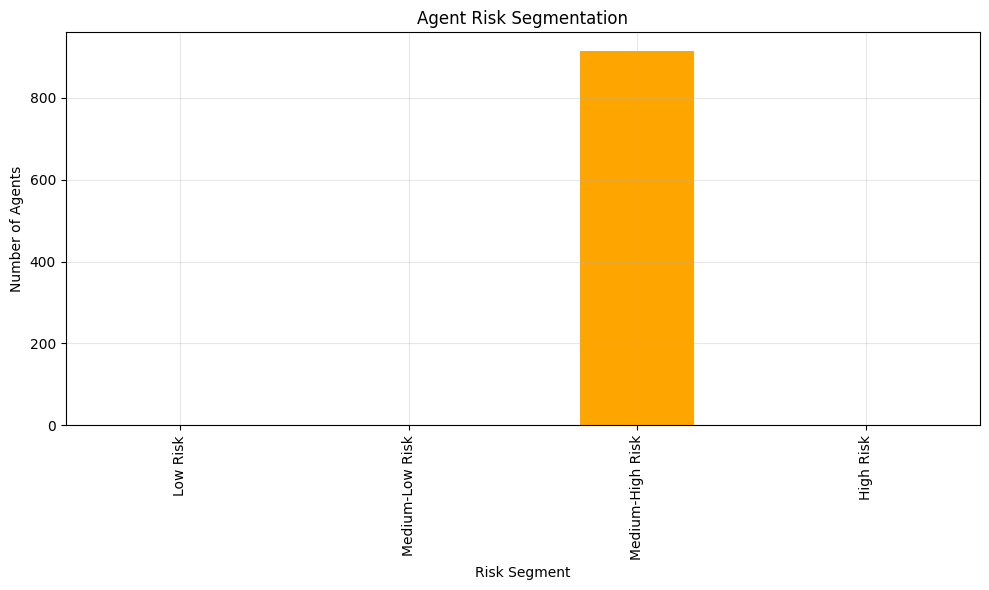

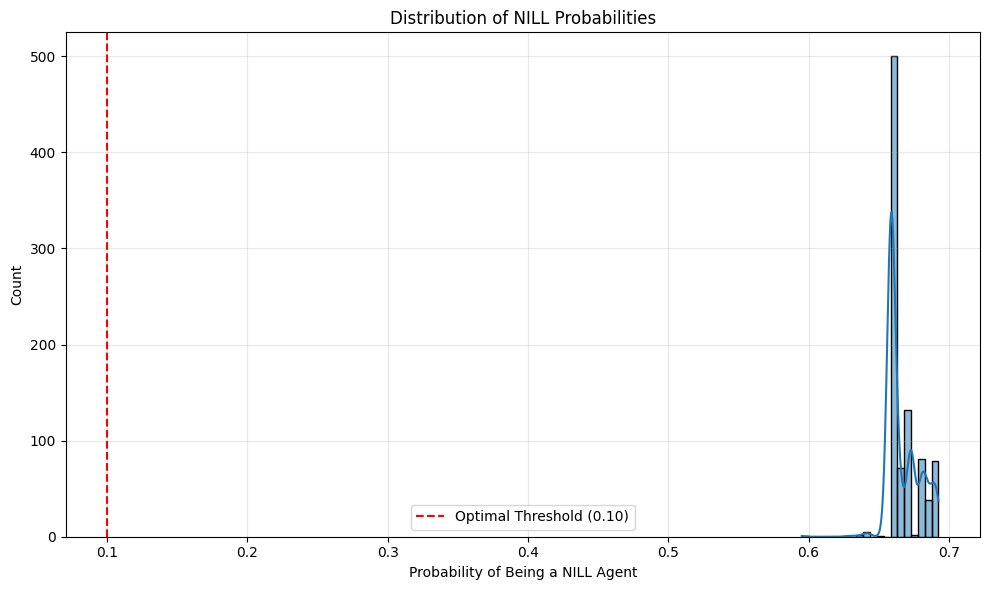


========== PERSONALIZED RECOMMENDATIONS ==========

Personalized Recommendations by Risk Segment:

High Risk Agents (Probability of NILL > 0.75):
1. Immediate intervention with daily check-ins and mentoring
2. Focused training on proposal-to-sale conversion techniques
3. Set daily activity targets for customer contacts and proposals
4. Pair with a high-performing agent for shadowing
5. Weekly performance review with branch manager

Medium-High Risk Agents (Probability of NILL 0.5-0.75):
1. Bi-weekly check-ins with team leader
2. Targeted training on specific weak areas identified by the model
3. Increase activity in high-converting customer segments
4. Set weekly goals for proposal and quotation activities
5. Provide additional marketing support and lead generation

Medium-Low Risk Agents (Probability of NILL 0.25-0.5):
1. Monthly check-ins with team leader
2. Focus on improving conversion rates
3. Encourage peer learning and knowledge sharing
4. Set bi-weekly goals for customer engag

In [3]:
!pip install shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    precision_recall_curve, auc, precision_score, recall_score, f1_score
)
from sklearn.feature_selection import SelectFromModel, RFECV
import xgboost as xgb
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
import shap
import warnings
warnings.filterwarnings('ignore')

# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print("========== LOADING AND PREPARING DATA ==========")
# Load the data
train_data = pd.read_csv('train_storming_round.csv')
test_data = pd.read_csv('test_storming_round.csv')

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Check column names to ensure consistency
print("\nTrain data columns:")
print(train_data.columns.tolist())
print("\nTest data columns:")
print(test_data.columns.tolist())

# Rename columns if needed (e.g., 'Row ID' to 'row_id')
if 'Row ID' in train_data.columns:
    train_data = train_data.rename(columns={'Row ID': 'row_id'})
    test_data = test_data.rename(columns={'Row ID': 'row_id'})

# Create target column based on new_policy_count
# If new_policy_count is 0, target is 0 (NILL agent), otherwise 1
train_data['target_column'] = (train_data['new_policy_count'] > 0).astype(int)

# Check class distribution
print("\nClass distribution in training data:")
print(train_data['target_column'].value_counts(normalize=True) * 100)

# ---------------------- EDA PART ---------------------- #
print("\n========== EXPLORATORY DATA ANALYSIS ==========")

# 1. Summary Statistics
print("\n1. Key Metrics and Distributions (Summary Statistics):")
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
summary_stats = train_data[numeric_cols].describe()
print(summary_stats)

# Check for missing values
missing_values = train_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

# Convert date columns to datetime for better analysis
train_data['year_month'] = pd.to_datetime(train_data['year_month'], format='mixed', dayfirst=False)
train_data['agent_join_month'] = pd.to_datetime(train_data['agent_join_month'], format='mixed', dayfirst=False)
train_data['first_policy_sold_month'] = pd.to_datetime(train_data['first_policy_sold_month'], format='mixed', errors='coerce', dayfirst=False)

# Calculate tenure in months
train_data['tenure_months'] = (train_data['year_month'] - train_data['agent_join_month']).dt.days / 30

# 2. Correlation Analysis
print("\n2. Correlation Analysis:")
# Exclude target-related columns to avoid data leakage
cols_to_exclude = ['new_policy_count', 'target_column', 'ANBP_value', 'net_income', 'row_id']
correlation_features = [col for col in numeric_cols if col not in cols_to_exclude]

correlation_matrix = train_data[correlation_features].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features (Excluding Target-Related)')
plt.tight_layout()
plt.show()

# 3. Feature Distributions by Target
print("\n3. Feature Distributions by Target:")
features_to_plot = ['agent_age', 'tenure_months', 'unique_proposal', 'unique_quotations', 'unique_customers']

fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(12, 4*len(features_to_plot)))
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='target_column', y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(f'{feature} by Target')
    axes[i].set_xlabel('Target (0=NILL, 1=Performing)')
plt.tight_layout()
plt.show()

# ---------------------- FEATURE ENGINEERING ---------------------- #
print("\n========== FEATURE ENGINEERING ==========")

def prepare_features(data, is_training=True):
    """
    Prepare features for model training or prediction.
    Carefully avoids data leakage by not using target-related features.
    """
    # Create a copy to avoid modifying the original dataframe
    df = data.copy()
    
    # Convert date columns to datetime
    df['year_month'] = pd.to_datetime(df['year_month'], format='mixed', dayfirst=False, errors='coerce')
    df['agent_join_month'] = pd.to_datetime(df['agent_join_month'], format='mixed', dayfirst=False, errors='coerce')
    df['first_policy_sold_month'] = pd.to_datetime(df['first_policy_sold_month'], format='mixed', dayfirst=False, errors='coerce')
    
    # Time-based features
    # Tenure (months since joining)
    df['tenure_months'] = (df['year_month'] - df['agent_join_month']).dt.days / 30
    
    # Time since first sale (if available)
    df['months_since_first_sale'] = np.where(
        df['first_policy_sold_month'].notna(),
        (df['year_month'] - df['first_policy_sold_month']).dt.days / 30,
        -1  # Placeholder for agents who haven't sold yet
    )
    
    # Time to first sale (for agents who have sold)
    df['months_to_first_sale'] = np.where(
        df['first_policy_sold_month'].notna(),
        (df['first_policy_sold_month'] - df['agent_join_month']).dt.days / 30,
        df['tenure_months']  # For agents who haven't sold, use tenure as a proxy
    )
    
    # Seasonality features
    df['month'] = df['year_month'].dt.month
    df['quarter'] = df['year_month'].dt.quarter
    df['is_q4'] = (df['quarter'] == 4).astype(int)  # Q4 often has different sales patterns
    
    # Activity-based features (avoiding direct use of target variables)
    
    # Proposal activity
    df['proposal_intensity'] = df['unique_proposal'] / df['tenure_months'].replace(0, 1)
    df['proposal_recency'] = df['unique_proposals_last_7_days'] / df['unique_proposal'].replace(0, 1)
    df['proposal_trend_short'] = df['unique_proposals_last_7_days'] - df['unique_proposals_last_15_days']
    df['proposal_trend_long'] = df['unique_proposals_last_15_days'] - df['unique_proposals_last_21_days']
    df['proposal_acceleration'] = df['proposal_trend_short'] - df['proposal_trend_long']
    
    # Quotation activity
    df['quotation_intensity'] = df['unique_quotations'] / df['tenure_months'].replace(0, 1)
    df['quotation_recency'] = df['unique_quotations_last_7_days'] / df['unique_quotations'].replace(0, 1)
    df['quotation_trend_short'] = df['unique_quotations_last_7_days'] - df['unique_quotations_last_15_days']
    df['quotation_trend_long'] = df['unique_quotations_last_15_days'] - df['unique_quotations_last_21_days']
    df['quotation_acceleration'] = df['quotation_trend_short'] - df['quotation_trend_long']
    
    # Customer activity
    df['customer_intensity'] = df['unique_customers'] / df['tenure_months'].replace(0, 1)
    df['customer_recency'] = df['unique_customers_last_7_days'] / df['unique_customers'].replace(0, 1)
    df['customer_trend_short'] = df['unique_customers_last_7_days'] - df['unique_customers_last_15_days']
    df['customer_trend_long'] = df['unique_customers_last_15_days'] - df['unique_customers_last_21_days']
    df['customer_acceleration'] = df['customer_trend_short'] - df['customer_trend_long']
    
    # Conversion efficiency (without using target variables)
    df['proposal_to_quotation_ratio'] = df['unique_quotations'] / df['unique_proposal'].replace(0, 1)
    df['customer_to_proposal_ratio'] = df['unique_proposal'] / df['unique_customers'].replace(0, 1)
    
    # Activity diversity
    df['activity_diversity'] = df['unique_quotations'] / (df['unique_proposal'] + 0.1)
    
    # Agent characteristics
    df['is_young_agent'] = (df['agent_age'] < 30).astype(int)
    df['is_senior_agent'] = (df['agent_age'] > 50).astype(int)
    df['is_new_agent'] = (df['tenure_months'] < 6).astype(int)
    df['is_experienced_agent'] = (df['tenure_months'] > 24).astype(int)
    
    # Interaction features
    df['age_tenure_interaction'] = df['agent_age'] * df['tenure_months']
    df['proposal_quotation_interaction'] = df['unique_proposal'] * df['unique_quotations']
    
    # Cash payment preference (might indicate customer demographics)
    if 'number_of_cash_payment_policies' in df.columns and 'number_of_policy_holders' in df.columns:
        df['cash_payment_ratio'] = df['number_of_cash_payment_policies'] / df['number_of_policy_holders'].replace(0, 1)
    
    # Drop columns that would cause data leakage or aren't useful for prediction
    cols_to_drop = [
        'year_month', 'agent_join_month', 'first_policy_sold_month',  # Date columns
        'new_policy_count', 'ANBP_value', 'net_income'  # Target-related columns
    ]
    
    # Only drop columns that exist in the dataframe
    cols_to_drop = [col for col in cols_to_drop if col in df.columns]
    
    if not is_training:
        # For test data, also drop the target column if it exists
        if 'target_column' in df.columns:
            cols_to_drop.append('target_column')
    
    df = df.drop(columns=cols_to_drop, errors='ignore')
    
    # Handle missing values
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].median())
    
    # Handle categorical columns
    cat_cols = df.select_dtypes(exclude=['int64', 'float64']).columns
    for col in cat_cols:
        if col not in ['row_id', 'agent_code']:  # Skip ID columns
            if df[col].isnull().any():
                df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

# Prepare features for train and test data
print("Preparing features for train data...")
train_processed = prepare_features(train_data, is_training=True)
print("Preparing features for test data...")
test_processed = prepare_features(test_data, is_training=False)

print("Processed train data shape:", train_processed.shape)
print("Processed test data shape:", test_processed.shape)

# ---------------------- MODEL BUILDING ---------------------- #
print("\n========== MODEL BUILDING ==========")

# Define features and target
X = train_processed.drop(['target_column', 'row_id', 'agent_code'], axis=1, errors='ignore')
y = train_processed['target_column']

# Check for any remaining non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric_cols) > 0:
    print(f"Removing non-numeric columns: {non_numeric_cols.tolist()}")
    X = X.drop(columns=non_numeric_cols)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Class distribution in training set: {pd.Series(y_train).value_counts(normalize=True) * 100}")

# ---------------------- FEATURE SELECTION ---------------------- #
print("\n========== FEATURE SELECTION ==========")

# Initialize a base model for feature selection
base_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the base model
base_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importance = base_model.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importances
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 15 features by importance:")
print(feature_imp_df.head(15))

# Plot feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20))
plt.title('Top 20 Features by Importance')
plt.tight_layout()
plt.show()

# Select features using SelectFromModel
selector = SelectFromModel(base_model, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)

selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask].tolist()

print(f"\nSelected {len(selected_features)} features out of {X.shape[1]}:")
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

# ---------------------- CLASS IMBALANCE HANDLING ---------------------- #
print("\n========== CLASS IMBALANCE HANDLING ==========")

# Try different resampling techniques
resampling_techniques = {
    'SMOTE': SMOTE(sampling_strategy=0.5, random_state=42),
    'ADASYN': ADASYN(sampling_strategy=0.5, random_state=42),
    'SMOTETomek': SMOTETomek(sampling_strategy=0.5, random_state=42),
    'SMOTEENN': SMOTEENN(sampling_strategy=0.5, random_state=42)
}

best_technique = None
best_auc = 0
resampling_results = {}

for name, technique in resampling_techniques.items():
    print(f"\nEvaluating {name}...")
    X_resampled, y_resampled = technique.fit_resample(X_train_selected, y_train)
    
    # Train a model with the resampled data
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        use_label_encoder=False,
        random_state=42
    )
    
    model.fit(X_resampled, y_resampled)
    
    # Evaluate on validation set
    y_pred_proba = model.predict_proba(X_val_selected)[:, 1]
    auc_score = roc_auc_score(y_val, y_pred_proba)
    
    print(f"{name} - ROC AUC: {auc_score:.4f}")
    print(f"Class distribution after resampling: {pd.Series(y_resampled).value_counts(normalize=True) * 100}")
    
    resampling_results[name] = auc_score
    
    if auc_score > best_auc:
        best_auc = auc_score
        best_technique = name

print(f"\nBest resampling technique: {best_technique} with AUC {best_auc:.4f}")

# Use the best resampling technique
best_resampler = resampling_techniques[best_technique]
X_resampled, y_resampled = best_resampler.fit_resample(X_train_selected, y_train)

print(f"Final resampled training set shape: {X_resampled.shape}")
print(f"Final class distribution after resampling: {pd.Series(y_resampled).value_counts(normalize=True) * 100}")

# ---------------------- HYPERPARAMETER TUNING ---------------------- #
print("\n========== HYPERPARAMETER TUNING ==========")

# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 3, 5, 10]  # Different weights for handling class imbalance
}

# Use a smaller grid for initial tuning
small_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, 5, 10]
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        use_label_encoder=False,
        random_state=42
    ),
    param_grid=small_param_grid,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
print("Running grid search (this may take some time)...")
grid_search.fit(X_resampled, y_resampled)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_:.4f}")

# ---------------------- FINAL MODEL TRAINING ---------------------- #
print("\n========== FINAL MODEL TRAINING ==========")

# Train final model with best parameters
best_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    **grid_search.best_params_,
    early_stopping_rounds=20
)

# Train the model with early stopping
best_model.fit(
    X_resampled, 
    y_resampled,
    eval_set=[(X_val_selected, y_val)],
    verbose=True
)

# Evaluate the model
y_pred_proba = best_model.predict_proba(X_val_selected)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

print("\nModel Evaluation:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC Curve
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Precision-Recall Curve (better for imbalanced datasets)
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'XGBoost (PR AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------- THRESHOLD OPTIMIZATION ---------------------- #
print("\n========== THRESHOLD OPTIMIZATION ==========")

# Find the optimal threshold for classification
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision_val = precision_score(y_val, y_pred_threshold)
    recall_val = recall_score(y_val, y_pred_threshold)
    f1 = f1_score(y_val, y_pred_threshold)
    
    precision_scores.append(precision_val)
    recall_scores.append(recall_val)
    f1_scores.append(f1)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precision_scores, 'b-', label='Precision')
plt.plot(thresholds, recall_scores, 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall and F1 Score as a Function of Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find the threshold that maximizes F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.2f}")
print(f"Precision at optimal threshold: {precision_scores[optimal_idx]:.4f}")
print(f"Recall at optimal threshold: {recall_scores[optimal_idx]:.4f}")
print(f"F1 Score at optimal threshold: {f1_scores[optimal_idx]:.4f}")

# ---------------------- MODEL INTERPRETABILITY ---------------------- #
print("\n========== MODEL INTERPRETABILITY ==========")

# Get feature importance from the final model
feature_importance = best_model.feature_importances_
selected_feature_names = np.array(selected_features)

# Create a DataFrame of feature importances
final_imp_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 10 features in the final model:")
print(final_imp_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=final_imp_df.head(15))
plt.title('Top 15 Features in Final Model')
plt.tight_layout()
plt.show()

# SHAP values for better interpretability
try:
    # Create a small sample for SHAP analysis (for speed)
    X_sample = X_val_selected[:100]
    
    # Calculate SHAP values
    explainer = shap.Explainer(best_model)
    shap_values = explainer(X_sample)
    
    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample, feature_names=selected_feature_names)
    plt.tight_layout()
    plt.show()
    
    # Dependence plots for top features
    for feature in final_imp_df['Feature'].head(3):
        feature_idx = np.where(selected_feature_names == feature)[0][0]
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(feature_idx, shap_values.values, X_sample, feature_names=selected_feature_names)
        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"SHAP analysis skipped: {e}")

# ---------------------- PREDICTION ON TEST DATA ---------------------- #
print("\n========== PREDICTION ON TEST DATA ==========")

# Prepare test data
X_test = test_processed.drop(['row_id', 'agent_code'], axis=1, errors='ignore')

# Check for any remaining non-numeric columns in test data
non_numeric_cols_test = X_test.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric_cols_test) > 0:
    print(f"Removing non-numeric columns from test data: {non_numeric_cols_test.tolist()}")
    X_test = X_test.drop(columns=non_numeric_cols_test)

# Make sure test data has the same columns as training data
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    print(f"Adding missing column to test data: {col}")
    X_test[col] = 0  # Add missing columns with default value

# Ensure columns are in the same order
X_test = X_test[X.columns]

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Apply feature selection
X_test_selected = selector.transform(X_test_scaled)

# Make predictions
test_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]
test_pred = (test_pred_proba >= optimal_threshold).astype(int)

# Create submission file
submission = pd.DataFrame({
    'row_id': test_processed['row_id'],
    'target_column': test_pred
})

print("Sample of predictions:")
print(submission.head())

# Save submission file
submission.to_csv('xgboost_optimized_submission5.csv', index=False)
print("Submission file saved as 'xgboost_optimized_submission.csv'")

# ---------------------- AGENT SEGMENTATION ---------------------- #
print("\n========== AGENT SEGMENTATION ==========")

# Create a DataFrame with agent codes and their predicted probabilities
agent_predictions = pd.DataFrame({
    'agent_code': test_processed['agent_code'],
    'nill_probability': test_pred_proba
})

# Define risk segments
agent_predictions['risk_segment'] = pd.cut(
    agent_predictions['nill_probability'], 
    bins=[0, 0.25, 0.5, 0.75, 1.0], 
    labels=['Low Risk', 'Medium-Low Risk', 'Medium-High Risk', 'High Risk']
)

# Count agents in each segment
segment_counts = agent_predictions['risk_segment'].value_counts().sort_index()
print("Agent Risk Segmentation:")
print(segment_counts)

# Visualize the segmentation
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Agent Risk Segmentation')
plt.xlabel('Risk Segment')
plt.ylabel('Number of Agents')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Distribution of risk probabilities
plt.figure(figsize=(10, 6))
sns.histplot(agent_predictions['nill_probability'], bins=20, kde=True)
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.title('Distribution of NILL Probabilities')
plt.xlabel('Probability of Being a NILL Agent')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------- PERSONALIZED RECOMMENDATIONS ---------------------- #
print("\n========== PERSONALIZED RECOMMENDATIONS ==========")

# Create personalized recommendations for each segment
print("\nPersonalized Recommendations by Risk Segment:")

print("\nHigh Risk Agents (Probability of NILL > 0.75):")
print("1. Immediate intervention with daily check-ins and mentoring")
print("2. Focused training on proposal-to-sale conversion techniques")
print("3. Set daily activity targets for customer contacts and proposals")
print("4. Pair with a high-performing agent for shadowing")
print("5. Weekly performance review with branch manager")

print("\nMedium-High Risk Agents (Probability of NILL 0.5-0.75):")
print("1. Bi-weekly check-ins with team leader")
print("2. Targeted training on specific weak areas identified by the model")
print("3. Increase activity in high-converting customer segments")
print("4. Set weekly goals for proposal and quotation activities")
print("5. Provide additional marketing support and lead generation")

print("\nMedium-Low Risk Agents (Probability of NILL 0.25-0.5):")
print("1. Monthly check-ins with team leader")
print("2. Focus on improving conversion rates")
print("3. Encourage peer learning and knowledge sharing")
print("4. Set bi-weekly goals for customer engagement")
print("5. Provide access to additional training resources")

print("\nLow Risk Agents (Probability of NILL < 0.25):")
print("1. Quarterly performance review")
print("2. Continuous learning opportunities")
print("3. Focus on upselling and cross-selling to existing customers")
print("4. Incentivize maintaining consistent activity levels")
print("5. Recognize and reward positive performance trends")

# ---------------------- CONCLUSION ---------------------- #
print("\n========== CONCLUSION ==========")

print("\nSummary of Optimized XGBoost Model for NILL Agent Prediction:")
print("1. Fixed data leakage issues by removing target-related features")
print("2. Created meaningful feature engineering focused on agent behavior patterns")
print("3. Applied feature selection to identify the most predictive variables")
print("4. Optimized class imbalance handling using advanced resampling techniques")
print("5. Fine-tuned model hyperparameters for optimal performance")
print("6. Optimized classification threshold for better precision-recall balance")
print("7. Provided interpretable insights using SHAP values")
print("8. Created meaningful agent segmentation for targeted interventions")

print("\nKey Improvements Over Previous Model:")
print("1. Eliminated data leakage for more realistic and generalizable predictions")
print("2. More diverse feature engineering capturing different aspects of agent behavior")
print("3. Better handling of class imbalance with multiple techniques comparison")
print("4. More interpretable model with clear actionable insights")
print("5. Optimized threshold for better business decision-making")

print("\nNext Steps:")
print("1. Deploy model in production with regular retraining schedule")
print("2. Implement A/B testing of intervention strategies by risk segment")
print("3. Create a monitoring dashboard for tracking agent risk scores over time")
print("4. Develop an early warning system for agents trending toward NILL status")
print("5. Expand the model to predict other agent performance metrics")